<a href="https://colab.research.google.com/github/Mobodot/Ineuron_DL_assignments/blob/main/001_understanding_images_and_cv_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
img_path = "/content/drive/MyDrive/car1.jpeg"

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

In [3]:
car1 = mpimg.imread(img_path)

In [9]:
car1.shape

(168, 300, 3)

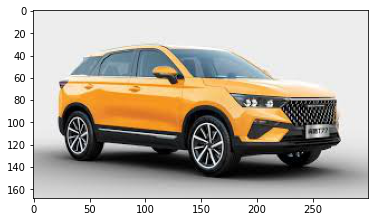

In [8]:
plt.imshow(car1) # visualize pictures using plt lib

In [12]:
car1_cv2 = cv2.imread(img_path)

In [13]:
cv2.imshow(car1_cv2)  # works on local

DisabledFunctionError: ignored

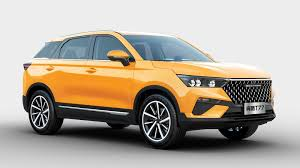

In [15]:
from google.colab.patches import cv2_imshow
cv2_imshow(car1_cv2)

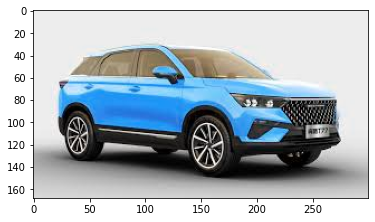

In [16]:
plt.imshow(car1_cv2)

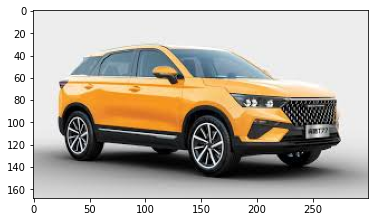

In [21]:
car1_cv2_BRG_RGB = cv2.cvtColor(car1_cv2, cv2.COLOR_BGR2RGB)
plt.imshow(car1_cv2_BRG_RGB)

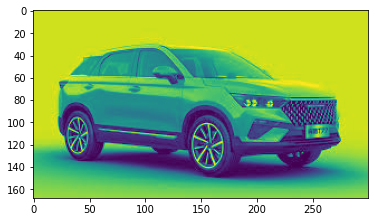

In [24]:
car1_cv2_BRG_GRAY = cv2.cvtColor(car1_cv2, cv2.COLOR_RGB2GRAY)
plt.imshow(car1_cv2_BRG_GRAY)

## Understanding composition of colored images

In [65]:
def visualize_RGB_channel(imgArray, figsize=(10,7)):
  B, G, R = cv2.split(imgArray)

  Z = np.ones(B.shape, dtype=B.dtype)  

  fig, ax = plt.subplots(2,2, figsize=figsize)

  [axi.set_axis_off() for axi in ax.ravel()]
    
  ax[0, 0].set_title("Original Image")
  ax[0, 0].imshow(cv2.merge((R,G,B)))
  ax[0, 0].set_axis_off()
  
  ax[0, 1].set_title("Red channel")
  ax[0, 1].imshow(cv2.merge((R,Z,Z)))

  ax[1, 0].set_title("Green channel")
  ax[1, 0].imshow(cv2.merge((Z,G, Z)))

  ax[1, 1].set_title("Blue channel")
  ax[1, 1].imshow(cv2.merge((Z,Z,B)))

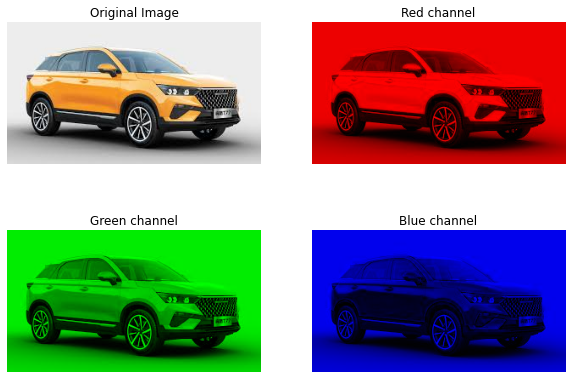

In [66]:
visualize_RGB_channel(car1_cv2)

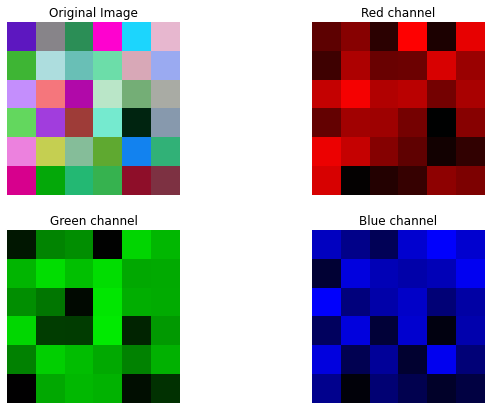

In [74]:
random_colored_image = np.random.randint(0,255,(6,6,3))
visualize_RGB_channel(random_colored_image)

## Understanding filters

In [77]:
sobel_filters = np.array([[1, 0, -1],
                         [2, 0, -2],
                         [1, 0, -1]])

print("highlighting Vertical edges: \n", sobel_filters)

highlighting Vertical edges: 
 [[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]


In [79]:
print("highlighting Horizontal edges: \n", sobel_filters.T)


highlighting Horizontal edges: 
 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


In [138]:
example1 = np.array([
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,255,255,255,255],
    [0,0,0,0,255,255,255,255,255,255,255,255],
    [0,0,0,0,255,255,255,255,255,255,255,255],
    [0,0,0,0,255,255,255,255,255,255,255,255],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],

])

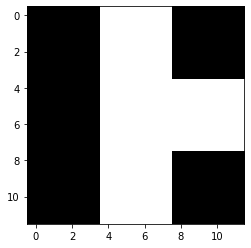

In [84]:
plt.imshow(example1, cmap="gray")

In [94]:
test = np.array([[1,3,5,6],
                [7,8,4,3],
                [3,5,1,3],
                [7,4,3,7],
                [3,5,3,2]])

(test[2:, 1:4 ])

array([[5, 1, 3],
       [4, 3, 7],
       [5, 3, 2]])

In [89]:
4 - 3//1 + 1

2

In [135]:
def simple_conv(imgArr, filterArr=None, stride=1):
  p_rows, p_cols = imgArr.shape[0], imgArr.shape[1]

  f = filterArr.shape[0]

  final_rows = (p_rows - f)//stride + 1
  final_cols = (p_cols - f)//stride + 1

  temp = list()

  for v_stride in range(final_rows):
    for h_stride in range(final_cols):
      target_area = imgArr[v_stride: v_stride+f, h_stride: h_stride+f]
      z = target_area * filterArr
      temp.append(sum(sum(z)))
  return np.array(temp).reshape(final_rows, final_cols)


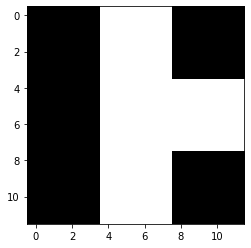

In [143]:
plt.imshow(example1, cmap="gray")

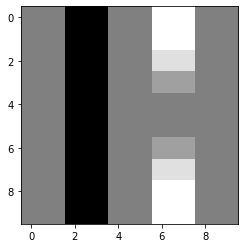

In [145]:
result = simple_conv(example1, sobel_filters)
plt.imshow(result, cmap="gray")

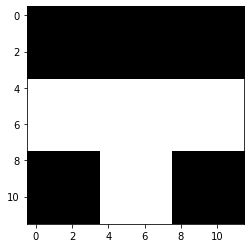

In [148]:
plt.imshow(example1.T, cmap="gray")

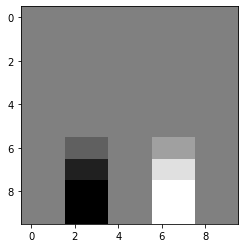

In [149]:
result = simple_conv(example1.T, sobel_filters)
plt.imshow(result, cmap="gray")

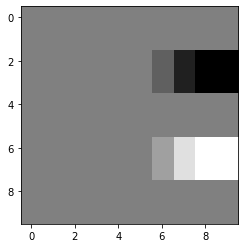

In [151]:
result = simple_conv(example1, sobel_filters.T)
plt.imshow(result, cmap="gray")

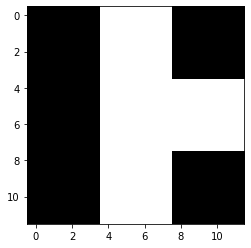

In [152]:
plt.imshow(example1, cmap="gray")

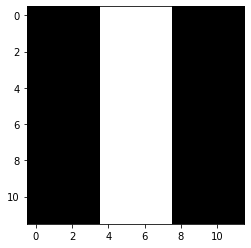

In [150]:
example2 = [
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
            ]

example2 = np.array(example2)
plt.imshow(example2, cmap="gray")

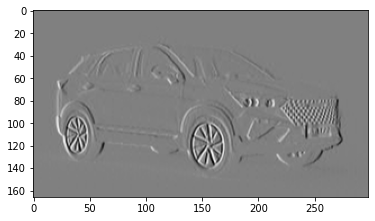

In [157]:
result = simple_conv(car1_cv2_BRG_GRAY, sobel_filters)
plt.imshow(result, cmap="gray")

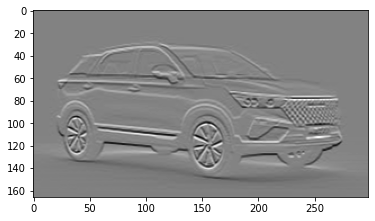

In [158]:
result = simple_conv(car1_cv2_BRG_GRAY, sobel_filters.T)
plt.imshow(result, cmap="gray")

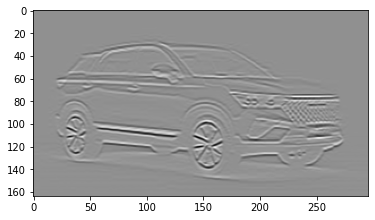

In [162]:
result1 = simple_conv(result, sobel_filters.T)
plt.imshow(result1, cmap="gray")

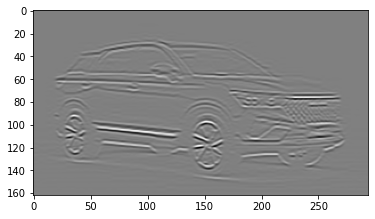

In [164]:
result2 = simple_conv(result1, sobel_filters.T)
plt.imshow(result2, cmap="gray")

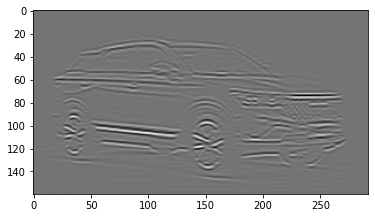

In [166]:
result3 = simple_conv(result2, sobel_filters.T)
plt.imshow(result3, cmap="gray")

In [167]:
test_img_path = "/content/5d380de9f4c6ed33c3071f4a_1563954665155.jpg"

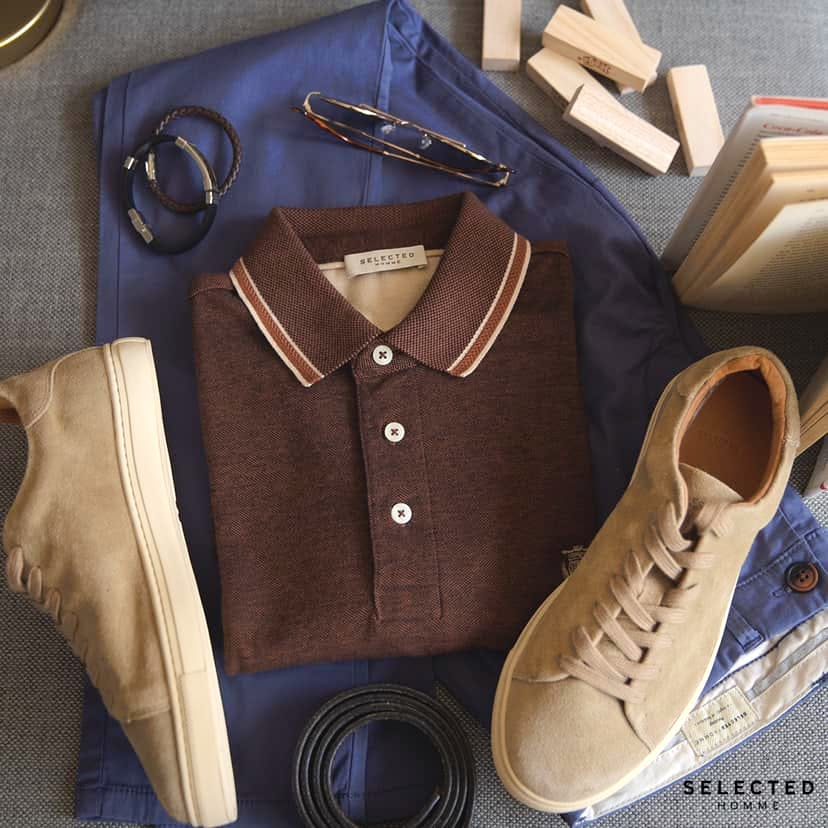

In [170]:
test_img = cv2.imread(test_img_path)
cv2_imshow(test_img)


In [171]:
test_img.shape

(828, 828, 3)

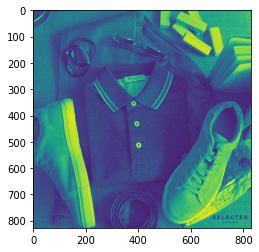

In [174]:
test_BGR_GRAY = cv2.cvtColor(test_img, cv2.COLOR_RGB2GRAY)
plt.imshow(test_BGR_GRAY)

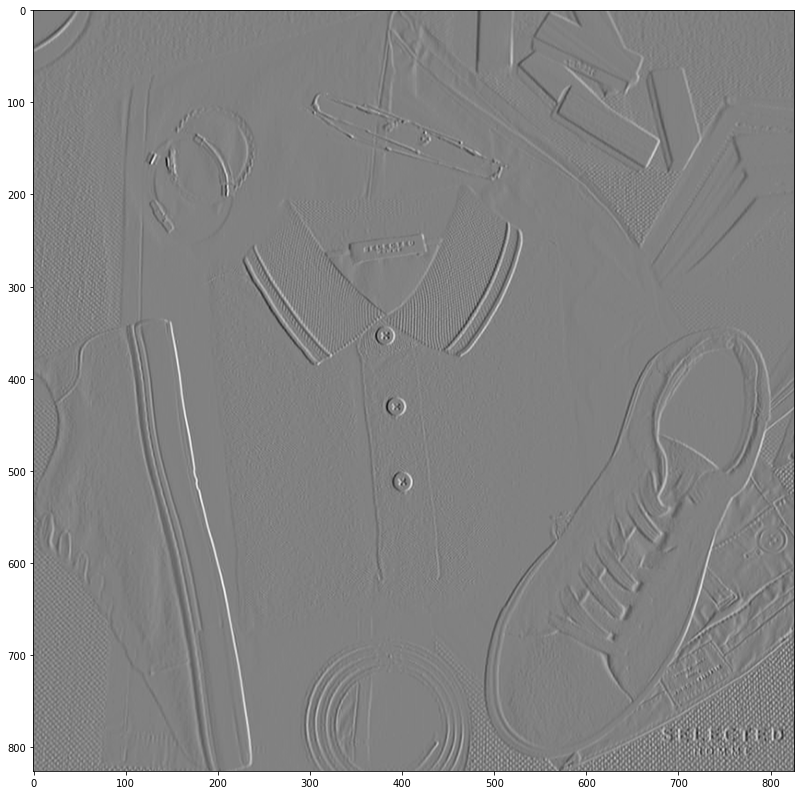

In [183]:
test_result = simple_conv(test_BGR_GRAY, sobel_filters)
plt.figure(figsize=(20,14))
plt.imshow(test_result, cmap="gray")

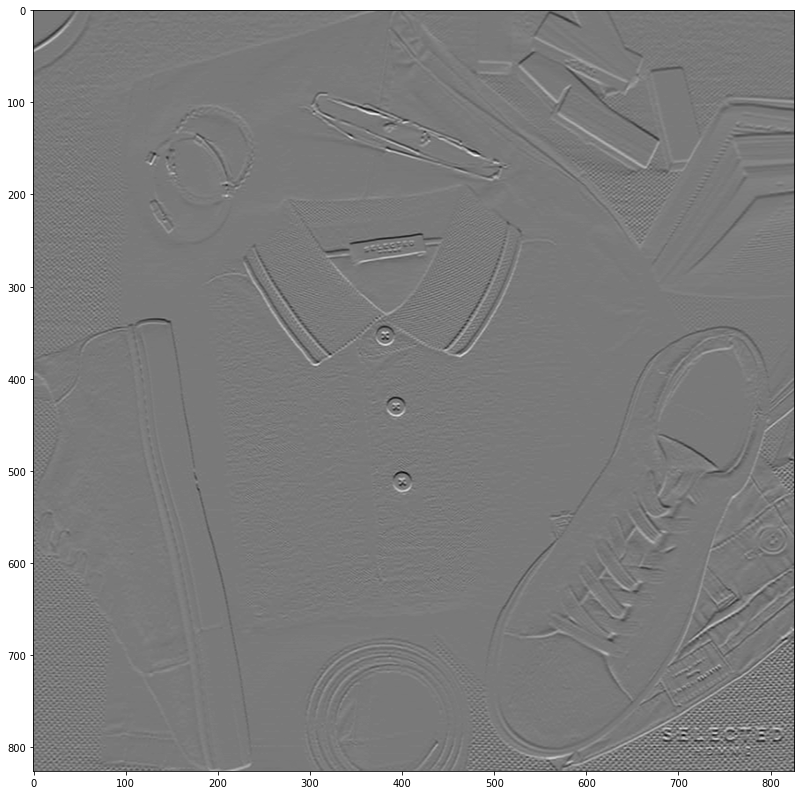

In [182]:
test_result = simple_conv(test_BGR_GRAY, sobel_filters.T)
plt.figure(figsize=(20,14))
plt.imshow(test_result, cmap="gray")